a. Hasil running time lima metode sorting dalam satu grafik dengan sumbu-x adalah jumlah data (n) dan sumbu-y adalah waktu (detik)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import pandas as pd
from tabulate import tabulate

In [2]:
def sort_average_time(sorter, list_size, num_tests):
    times = list()
    L = list(range(0, list_size))

    for i in range(num_tests):
        random.shuffle(L)
        t0 = time.time()
        sorter(L)
        t1 = time.time()
        t = t1 - t0
        times.append(t)
  
    return sum(times)/num_tests

def sort_runtime_graph(sorter_list, n=30, ntests=16):
    size = [100*i for i in range(1,n)]
    time_sorter_list = []

    for i in range(len(sorter_list)):
        time = list()
        for N in size:
            t = sort_average_time(sorter_list[i],N,ntests)
            t = round(t,4)
            time.append(t)
        time_sorter_list.append(time)

        plt.plot(size, time)
  
    for_table = {'Bubble Sort':time_sorter_list[0],
               'Selection Sort':time_sorter_list[1],
               'Insertion Sort':time_sorter_list[2],
               'Merge Sort':time_sorter_list[3],
               'Quick Sort':time_sorter_list[4],}
    time_table = pd.DataFrame(for_table, index=size)
    print(time_table)

    plt.xlabel('List Size')
    plt.ylabel('Run Time (seconds)')
    plt.grid()
    plt.legend(['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort'])
    plt.show()

In [3]:
def bubble_sort(L):
    N = len(L)
    while True:
        sorted = True #memberi tanda jika list telah terurut, maka program selesai
        
        #perhatikan setiap elemen pada list
        #lalu bandingkan dengan setiap nilai yang berdekatan
        for i in range(0,N-1): 
            if L[i+1] < L[i]: #jika elemen di i lebih besar dari elemen di sebelahnya yaitu i+1
                sorted = False #maka list belum terurut
                L[i], L[i+1] = L[i+1], L[i] #tukarkan kedua elemen tersebut
        if sorted: #jika elemen sudah terurut
            return L #masukkan list ke definisi fungsi
            break

In [4]:
def selection_sort(L):
    n = len(L)
    for i in range(n):
        min_index = i #Inisialisasi elemen terkecil
        for j in range(i+1, n): #untuk mengurutkan elemen dari yang terkecil
            if L[j] < L[min_index]: #periksa setiap elemen lebih kecil dari elemen terkecil di awal
                min_index = j #ganti elemen terkecil di inisialisasi dengan elemen yang lebih kecil
        L[i], L[min_index] = L[min_index], L[i] #tukar kedua elemen
    return L

In [5]:
def insertion_sort(L):
    for i in range(1, len(L)):
        key = L[i] #elemen yang ingin diposisikan di tempat yang benar
        j = i-1 #inisialisasi variabel untuk menempatkan key pada posisi yang benar
        while j >=0 and key < L[j] : #loop selama elemen key lebih kecil dari nilai yang berdekatan
            L[j+1] = L[j] #geser elemen satu posisi ke kiri
            j -= 1 #reposisi j untuk menunjuk ke elemen berikutnya
        L[j+1] = key #saat looping geser elemen selesai, posisikan key pada tempat yang benar
  
    return L

In [9]:
def merge_sort(L):
    if len(L)>1:
        mid = len(L)//2
        A = L[:mid]
        B = L[mid:]

        merge_sort(A)
        merge_sort(B)
        i = j = k = 0       
        while i < len(A) and j < len(B):
            if A[i] < B[j]:
                L[k] = A[i]
                i += 1
            else:
                L[k] = B[j]
                j += 1
                k += 1

        while i < len(A):
            L[k] = A[i]
            i += 1
            k += 1

        while j < len(B):
            L[k] = B[j]
            j += 1
            k += 1
    return L

In [10]:
def quick_sort(L):
    if len(L) > 1:
        pivot = max(L[0], L[-1])
        A, B = partition(L, pivot)
        quick_sort(A)
        quick_sort(B)
        A.extend(B)
        for i in range(len(L)):
            L[i] = A[i]
    return L

def partition(L, pivot):
    A = []
    B = []
    for element in L:
        if element < pivot:
            A.append(element)
        else:
            B.append(element)
    return A, B

      Bubble Sort  Selection Sort  Insertion Sort  Merge Sort  Quick Sort
100        0.0026          0.0012          0.0007      0.0090      0.0073
200        0.0112          0.0037          0.0032      0.0015      0.0201
300        0.0260          0.0067          0.0075      0.0018      0.0765
400        0.0482          0.0118          0.0130      0.0043      0.0621
500        0.0802          0.0196          0.0219      0.0107      0.0149
600        0.1404          0.0274          0.0327      0.0030      0.0275
700        0.1614          0.0374          0.0458      0.0245      0.0474
800        0.2028          0.0452          0.0641      0.0056      0.0253
900        0.2539          0.0603          0.0714      0.0124      0.0584
1000       0.3113          0.0739          0.0930      0.0170      0.0385
1100       0.3658          0.0970          0.1302      0.0403      0.0187
1200       0.4289          0.1102          0.1875      0.0085      0.0225
1300       0.5523          0.1378     

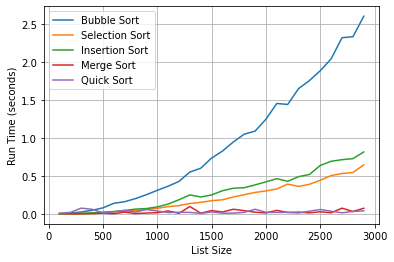

In [11]:
sort_runtime_graph([bubble_sort, selection_sort, insertion_sort, merge_sort, quick_sort])